In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from scipy.fftpack import fft2, dct, ifft2, idct

In [3]:
def dct2d(img, QF = 16):
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

def idct2d(img, QF = 16):
    return idct(idct(img.T, norm='ortho').T, norm='ortho')

In [4]:
def analyze(img):
    img_b, img_g, img_r = cv2.split(img)
    fig=plt.figure(figsize=(14, 14))
    columns = 2
    rows = 4
    bgr = cv2.cvtColor(cv2.merge((
        img_b, 
        img_g, 
        img_r
    )), cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(rows, columns, 1)
    ax.title.set_text("original")
    plt.imshow(bgr)
    ax = fig.add_subplot(rows, columns, 3)
    ax.title.set_text("Red [R]")
    plt.imshow(img_r, cmap="Reds")
    ax = fig.add_subplot(rows, columns, 5)
    ax.title.set_text("Green [G]")
    plt.imshow(img_g, cmap="Greens")
    ax = fig.add_subplot(rows, columns, 7)
    ax.title.set_text("Blue [B]")
    plt.imshow(img_b, cmap="Blues")
    
    img_y, img_u, img_v = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YUV))
    img_u_resize = cv2.resize(img_u, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)    
    img_v_resize = cv2.resize(img_v, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    img_u_resize_dct = dct2d(img_u_resize)
    img_v_resize_dct = dct2d(img_v_resize)

    img_u_resize_idct = idct2d(img_u_resize_dct)
    img_u_resize_idct = np.uint8(img_u_resize_idct)
    img_v_resize_idct = idct2d(img_v_resize_dct)    
    img_v_resize_idct = np.uint8(img_v_resize_idct)
    img_u_restored = cv2.resize(img_u_resize_idct, dsize=img_y.shape[::-1], interpolation=cv2.INTER_LINEAR)
    img_v_restored = cv2.resize(img_v_resize_idct, dsize=img_y.shape[::-1], interpolation=cv2.INTER_LINEAR)
    bgr_restored = cv2.cvtColor(cv2.merge((
        img_y, 
        img_u_restored, 
        img_v_restored
    )), cv2.COLOR_YUV2RGB)
    ax = fig.add_subplot(rows, columns, 2)
    ax.title.set_text("Restore [Y + V/4 + U/4]")
    plt.imshow(bgr_restored)
    ax = fig.add_subplot(rows, columns, 4)
    ax.title.set_text("Red Wire [V/Pr]")
    plt.imshow(img_v, cmap="Reds")
    ax = fig.add_subplot(rows, columns, 6)
    ax.title.set_text("Green Wire [Y]")
    plt.imshow(img_y, cmap="gray")
    ax = fig.add_subplot(rows, columns, 8)
    ax.title.set_text("Blue Wire [U/Pb]")
    plt.imshow(img_u, cmap="Blues")
    plt.show()
    result = [
        np.corrcoef(img_g.flat, img_r.flat)[0][1],
        np.corrcoef(img_g.flat, img_b.flat)[0][1],
        np.corrcoef(img_r.flat, img_b.flat)[0][1],
        np.corrcoef(img_y.flat, img_u.flat)[0][1],
        np.corrcoef(img_y.flat, img_v.flat)[0][1],
        np.corrcoef(img_u.flat, img_v.flat)[0][1]
    ]
    print("G-R {}".format(result[0]))
    print("G-B {}".format(result[1]))
    print("R-B {}".format(result[2]))
    print("Y-U {}".format(result[3]))
    print("Y-V {}".format(result[4]))
    print("U-V {}".format(result[5]))
    return result
    

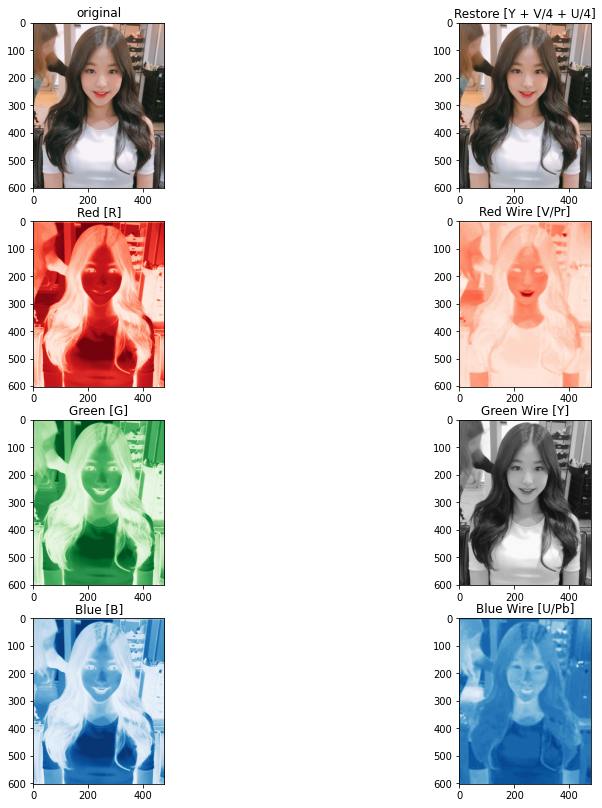

G-R 0.9650438877864724
G-B 0.9877574526433006
R-B 0.9190502223863559
Y-U 0.08772984221426937
Y-V 0.19058070458630344
U-V -0.9125085104211145


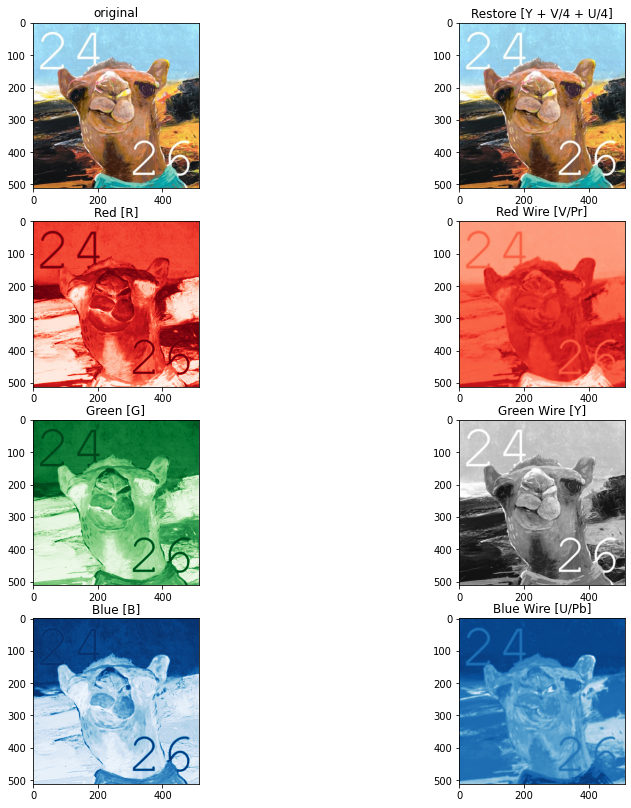

G-R 0.7147814275793081
G-B 0.9188189910964525
R-B 0.44629808626323825
Y-U 0.19673888431012626
Y-V -0.3042399430798942
U-V -0.916777305255894


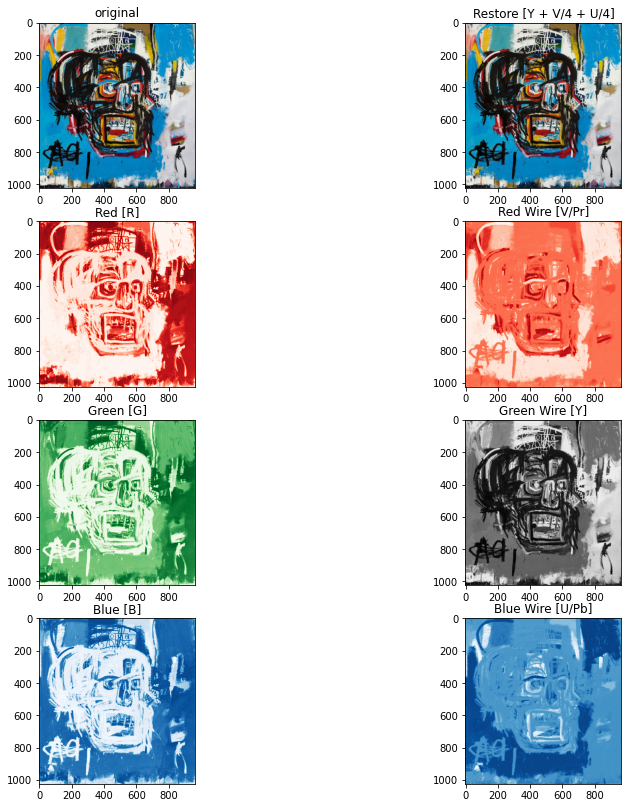

G-R 0.6630922336026422
G-B 0.8822552779974495
R-B 0.32794737608284985
Y-U -0.1003066754301164
Y-V 0.013313887852394674
U-V -0.9052794357273193


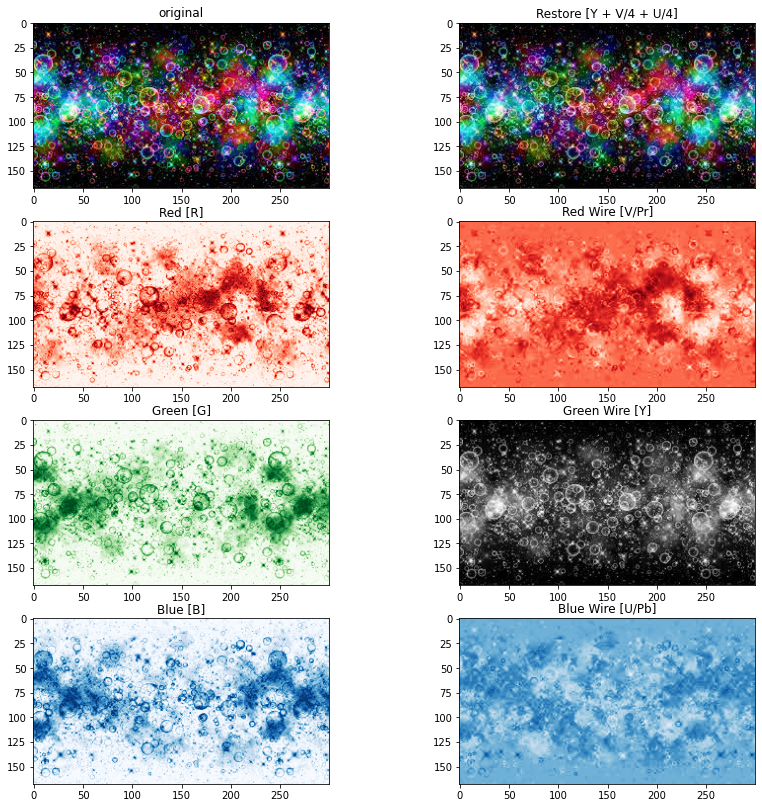

G-R 0.4972769174616781
G-B 0.747179482636195
R-B 0.5368908724690805
Y-U -0.00812999865447651
Y-V -0.22230037933267605
U-V -0.18925323821702356


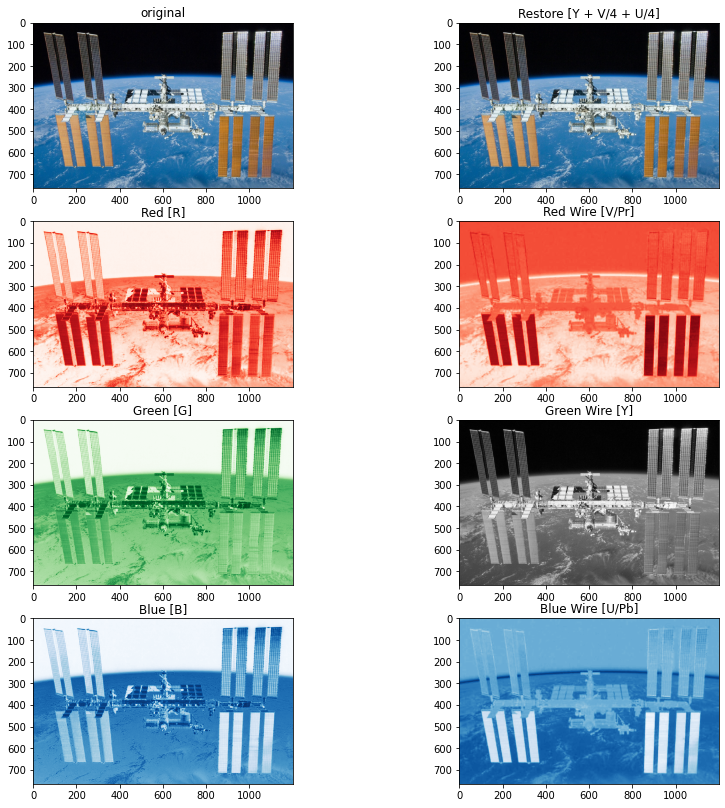

G-R 0.8540819345482483
G-B 0.9141224214653715
R-B 0.5790542606685413
Y-U 0.024241191151388376
Y-V -0.06721570763093153
U-V -0.9832153049631412


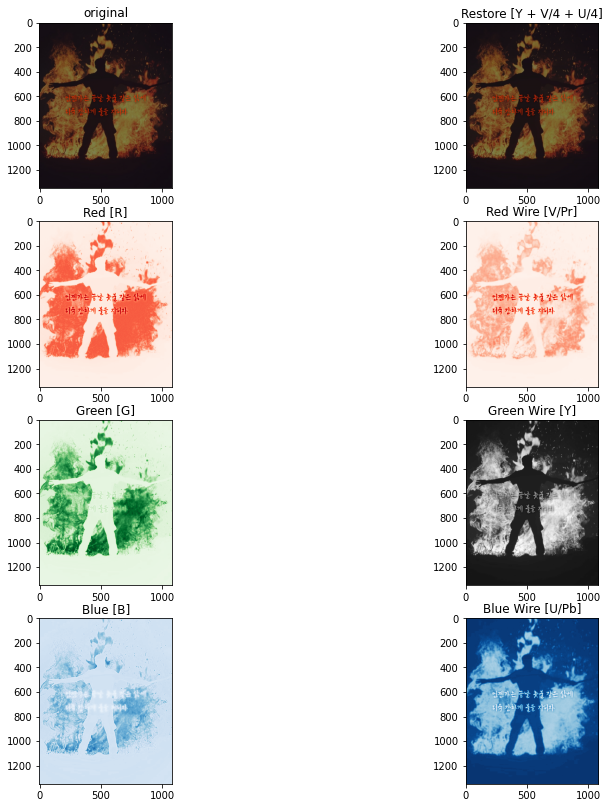

G-R 0.9029180560082724
G-B 0.9175209173236627
R-B 0.7207623321847982
Y-U -0.9686165740893227
Y-V 0.6586291074495362
U-V -0.7924535903803847


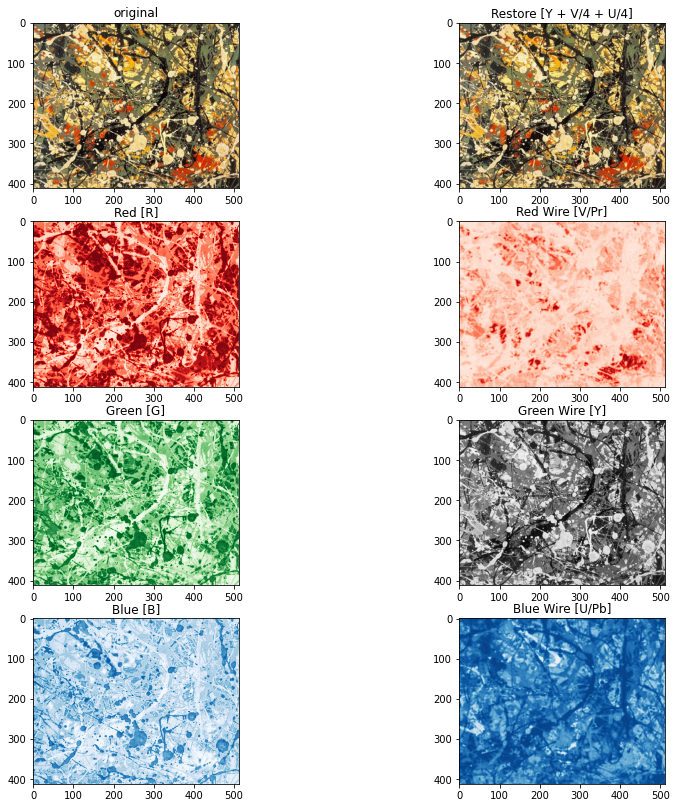

G-R 0.929629122780493
G-B 0.9124930136984035
R-B 0.7658623803064808
Y-U -0.6194121435854875
Y-V 0.2329143003150483
U-V -0.7411093652434335


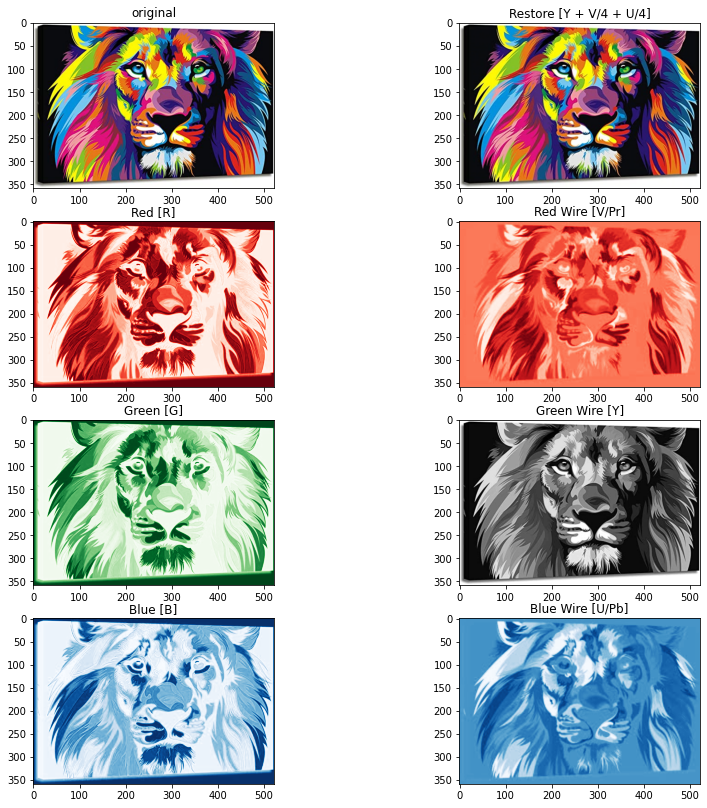

G-R 0.6924698727953466
G-B 0.6088766146913458
R-B 0.3592616007452321
Y-U -0.39298348111850434
Y-V 0.014849061393336423
U-V -0.413563475193633


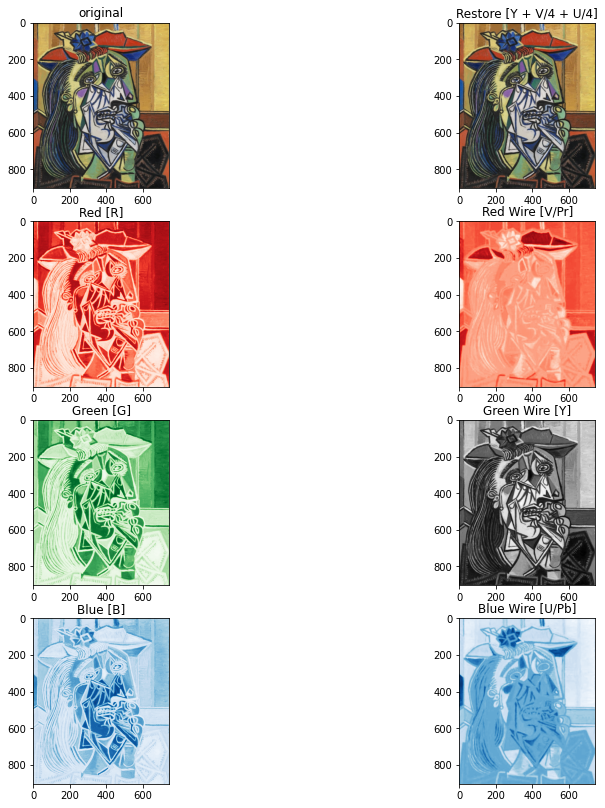

G-R 0.8914226007361924
G-B 0.7958613312047547
R-B 0.5784637403802845
Y-U -0.6061456230035591
Y-V 0.29649136972154394
U-V -0.7300245018082453


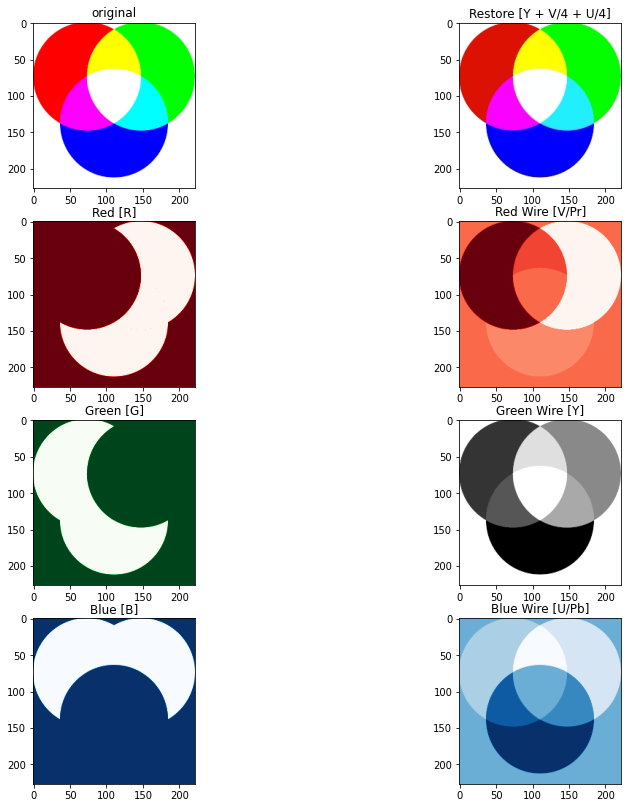

G-R 0.09413079090003705
G-B 0.09487398904386558
R-B 0.09515321981773149
Y-U -0.4070700280977091
Y-V -0.18944518728329074
U-V 0.07787196651780694


In [5]:
file_names = os.listdir("colorful_img/")
results = []
for fn in file_names:
    img = cv2.imread("colorful_img/" + fn)
    results.append(analyze(img))

In [11]:
mean_results = []
for i in range(len(results[0])):
    tmp = []
    for j in range(len(results)):
        tmp.append(results[j][i])
    mean_results.append(sum(tmp) / len(tmp))
result = mean_results
print("G-R {}".format(result[0]))
print("G-B {}".format(result[1]))
print("R-B {}".format(result[2]))
print("Y-U {}".format(result[3]))
print("Y-V {}".format(result[4]))
print("U-V {}".format(result[5]))

G-R 0.7204846844198689
G-B 0.7779759491800802
R-B 0.5328744091304594
Y-U -0.27939546063033915
Y-V 0.06235772139913705
U-V -0.6506312760692381
